In [1]:
# Import necessary libraries
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Download the `sample_brands` spreadsheet as a `.csv` file and load the data using Pandas - a Python library

In [2]:
# Path where you store the csv file on your local disk
path_to_data = 'opensponsorship data/task1/sample_brands-data.csv'

# Load data as a dataframe using pandas
data = pd.read_csv(path_to_data)

In [3]:
# Checking the number of missing values and data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand_id             5839 non-null   int64  
 1   created              5839 non-null   object 
 2   lastActive           5831 non-null   object 
 3   planLevel            5839 non-null   int64  
 4   num_sub_user         5839 non-null   int64  
 5   role                 5833 non-null   object 
 6   industry_categories  5816 non-null   object 
 7   bantScore            1295 non-null   float64
 8   companySize          2406 non-null   object 
 9   onboarding_stage     5600 non-null   float64
 10  country              4835 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 501.9+ KB


In [4]:
data.companySize.value_counts()

less than 10 employees    1765
10 - 49 employees          454
50 - 249 employees         111
1000+ employees             45
250 - 999 employees         31
Name: companySize, dtype: int64

In [4]:
data[data.planLevel > 0].created.sort_values()

3884    2019-02-28 17:21:54
5082    2019-09-05 13:55:34
75      2019-10-25 22:50:46
2514     2019-11-07 2:00:59
709     2019-11-18 17:52:32
               ...         
5590    2021-09-28 16:54:06
3588    2021-10-01 19:00:50
2080    2021-10-05 17:14:58
2351    2021-10-20 16:48:55
3294    2021-10-22 15:34:19
Name: created, Length: 65, dtype: object

## Distribution of different plan levels 

[Text(0, 0, '5774'),
 Text(0, 0, '29'),
 Text(0, 0, '18'),
 Text(0, 0, '10'),
 Text(0, 0, '8')]

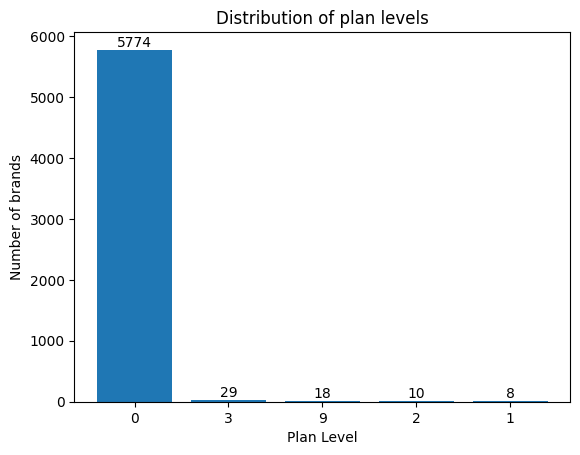

In [6]:
planLevels = data.planLevel.value_counts().index
planLevels = [str(i) for i in planLevels] # To get categorical form for easy plotting
counts = data.planLevel.value_counts().values

fig, ax = plt.subplots()
bars = ax.bar(planLevels, counts)

plt.xlabel('Plan Level')
plt.ylabel('Number of brands')
plt.title('Distribution of plan levels')

ax.bar_label(bars)

## Out of 5839 unique brands in the `sample_brands` spreadsheet, only 65 brands have upgraded to a paid subscription(planLevel>0)

In [7]:
len(data[data.planLevel>0])

65

### Distribution of brands with free plan and paid subscription 

[Text(0, 0, '5774'), Text(0, 0, '65')]

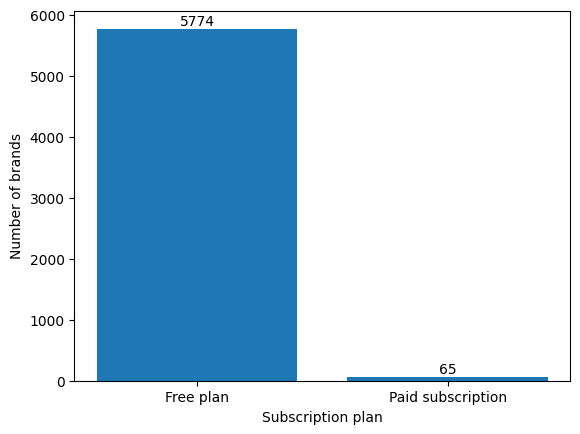

In [65]:
plans = ['Free plan', 'Paid subscription']
counts = [len(data[data.planLevel == 0]), len(data[data.planLevel>0])]

fig, ax = plt.subplots()
bars = ax.bar(plans, counts)

plt.xlabel('Subscription plan')
plt.ylabel('Number of brands')
ax.bar_label(bars)

## Of the 65 brands that have subscribed, 13 brands have missing `industry_categories` column i.e., the industries of 13 subscribed brands are unknown

In [8]:
print("the industries of {} subscribed brands are unknown".\
      format(len(data[(data.planLevel>0) & (data.industry_categories == '[]')])))

the industries of 13 subscribed brands are unknown


## The brands are from a total of 325 unique industries (all plan levels)


In [68]:
df = pd.DataFrame(data) # data[data.planLevel > 0]

# Convert the string representation of lists to actual lists, handling 'NaN' string
def convert_to_list(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

# `industry_categories` column is a string of lists - converting to a list is easier to process
df['industry_categories'] = df['industry_categories'].apply(convert_to_list)

# Drop rows with empty lists in the 'industry_categories' column
df = df[df['industry_categories'].apply(lambda x: len(x) > 0)]

# Extracting all unique strings from the 'industry_categories' column
unique_industries = df['industry_categories'].explode().unique()

print(f"All the unique {len(unique_industries)} industries in the spreadsheet are {unique_industries}")

All the unique 325 industries in the spreadsheet are ['Food & Beverage' 'Vitamins & Supplements' 'Apparel & Jewelry' 'Media'
 'Art' 'Music Production' 'Consumer Services' 'Education Services'
 'Wedding Services' 'Commercial  & Professional Services'
 'Lifestyle Services' 'Energy Drinks' 'Sports Drinks'
 'Agricultural Products' 'Packaged Foods & Meats' 'Outdoors' 'Energy Bars'
 'Snacks' 'Brewers' 'Wine' 'Flavored Water' 'Liqueurs' 'Iced Teas/Coffees'
 'Juices' 'Water' 'Personal Care' 'Banks' 'Retailing' 'Technology'
 'Health & Medical' 'Sports Health' 'Fitness & Performance'
 'Health Care Equipment' 'Health Care Distributors'
 'Health Care Technology' 'Shirts & Tops' 'Marketing' 'Automobiles'
 'Software & Services' 'Advertising' 'Personal Coaching' 'Child Care'
 'Skin Care' 'Heath & Vision Care Stores' 'General Merchandise Stores'
 'Consumer Durables' 'Health Care Supplies' 'Cosmetics' 'Pants' 'Shorts'
 'Outerwear' 'Hats' 'Sports Equipment' 'Tires & Rubber'
 'Sleepwear & Loungewear' 'Ma

## Out of all the 325 industries, only brands from 65 industries have upgraded to a paid subscription (planLevel > 0)

In [72]:
# Includes only the brands that moved from free to trial period and further
df = data[data.planLevel > 0]

##### USe only if the lists are in a string #########
# # Convert the string representation of lists to actual lists, handling 'NaN' string
# def convert_to_list(x):
#     try:
#         return ast.literal_eval(x)
#     except (ValueError, SyntaxError):
#         return []

# `industry_categories` column is a string of lists - converting to a list is easier to process
# df['industry_categories'] = df['industry_categories'].apply(convert_to_list)

# Drop rows with empty lists in the 'industry_categories' column
df = df[df['industry_categories'].apply(lambda x: len(x) > 0)]

# Extracting all unique strings from the 'industry_categories' column
unique_industries_trialplus = df['industry_categories'].explode().unique()

# Count the occurrences of each unique value in the 'industry_categories' column
category_counts_paid = df['industry_categories'].explode().value_counts()

print(f"The brands from these {len(unique_industries_trialplus)} industries have upgraded to a paid subscription - {unique_industries_trialplus}")

The brands from these 65 industries have upgraded to a paid subscription - ['Apparel & Jewelry' 'Shorts' 'Sleepwear & Loungewear' 'Masks'
 'Shirts & Tops' 'Outerwear' 'Hats' 'Retailing'
 'Internet & Direct Marketing Retail' 'Health & Medical'
 'Vitamins & Supplements' 'Food & Beverage' 'Lifestyle Services' 'Snacks'
 'Fast Food' 'Energy Drinks' 'Marketing' 'Advertising' 'Sports Drinks'
 'Fitness & Performance' 'Jewelry Stores' 'Food Distributors'
 'Food Retail' 'Distributors' 'Toy Stores' 'Heath & Vision Care Stores'
 'Jewelry Sets' 'Packaged Foods & Meats' 'Real Estate'
 'Real Estate Development ' 'Diversified Financials' 'Consumer Finance'
 'Consumer Durables' 'Outdoors' 'Technology' 'Suits' 'Pants'
 'Sports Health' 'Personal Care' 'Skin Care' 'Female Care' 'Hair Care'
 'Cosmetics' 'Wine' 'Champaigne' 'Headwear' 'Footwear'
 'Education Services' 'Consumer Services' 'Casinos & Gaming' 'Art' 'Pets'
 'Pet Food' 'Pet Clothing' 'Dog Training' 'Animal Shelter'
 'Animal Adoption' 'Apparel' 'D

## Brands with free plan (planLevel == 0) belong to all unique 325 industries

In [73]:
# Includes only the brands that are in free plan
df = data[data.planLevel == 0]

##### USe only if the lists are in a string #########
# # Convert the string representation of lists to actual lists, handling 'NaN' string
# def convert_to_list(x):
#     try:
#         return ast.literal_eval(x)
#     except (ValueError, SyntaxError):
#         return []

# `industry_categories` column is a string of lists - converting to a list is easier to process
# df['industry_categories'] = df['industry_categories'].apply(convert_to_list)

# Drop rows with empty lists in the 'industry_categories' column
df = df[df['industry_categories'].apply(lambda x: len(x) > 0)]

# Extracting all unique strings from the 'industry_categories' column
unique_industries_trialplus = df['industry_categories'].explode().unique()

# Count the occurrences of each unique value in the 'industry_categories' column
category_counts_free = df['industry_categories'].explode().value_counts()

print(f"The brands from these {len(unique_industries_trialplus)} industries are in free plan - {unique_industries_trialplus}")

The brands from these 325 industries are in free plan - ['Food & Beverage' 'Vitamins & Supplements' 'Apparel & Jewelry' 'Media'
 'Art' 'Music Production' 'Consumer Services' 'Education Services'
 'Wedding Services' 'Commercial  & Professional Services'
 'Lifestyle Services' 'Energy Drinks' 'Sports Drinks'
 'Agricultural Products' 'Packaged Foods & Meats' 'Outdoors' 'Energy Bars'
 'Snacks' 'Brewers' 'Wine' 'Flavored Water' 'Liqueurs' 'Iced Teas/Coffees'
 'Juices' 'Water' 'Personal Care' 'Banks' 'Retailing' 'Technology'
 'Health & Medical' 'Sports Health' 'Fitness & Performance'
 'Health Care Equipment' 'Health Care Distributors'
 'Health Care Technology' 'Shirts & Tops' 'Marketing' 'Automobiles'
 'Software & Services' 'Advertising' 'Personal Coaching' 'Child Care'
 'Skin Care' 'Heath & Vision Care Stores' 'General Merchandise Stores'
 'Consumer Durables' 'Health Care Supplies' 'Cosmetics' 'Pants' 'Shorts'
 'Outerwear' 'Hats' 'Sports Equipment' 'Tires & Rubber' 'Fast Food'
 'Car Wash & D

## Brands with paid plan and the top industries they belong to

In [76]:
# Displaying the industries and the number of brands
category_counts_paid[:20] # displaying top 15

Health & Medical          16
Apparel & Jewelry         14
Vitamins & Supplements    12
Food & Beverage            9
Marketing                  6
Sports Health              6
Fitness & Performance      6
Shirts & Tops              5
Outerwear                  4
Pants                      4
Shorts                     4
Personal Care              3
Advertising                3
Footwear                   3
Retailing                  3
Skin Care                  2
Technology                 2
Consumer Finance           2
Diversified Financials     2
Energy Drinks              2
Name: industry_categories, dtype: int64

## Brands with free plan and the top industries they belong to

In [77]:
# Displaying the industries and the number of brands
category_counts_free[:20] # displaying top 15

Apparel & Jewelry                      705
Health & Medical                       465
Shirts & Tops                          317
Marketing                              294
Food & Beverage                        267
Personal Care                          245
Fitness & Performance                  228
Retailing                              206
Lifestyle Services                     200
Outerwear                              190
Hats                                   181
Sports Health                          175
Vitamins & Supplements                 174
Shorts                                 149
Art                                    131
Technology                             128
Consumer Services                      127
Pants                                  124
Outdoors                               123
Commercial  & Professional Services    117
Name: industry_categories, dtype: int64

## Creating a dataframe to visualize industries and brand plans

In [ ]:
industries_data_free = pd.DataFrame(category_counts_free)
industries_data_free = industries_data_free.reset_index()
industries_data_free.rename(columns={'index': 'Industry', 'industry_categories': 'Num_of_brands'}, inplace=True)
industries_data_free['Subscription_plan'] = 'Free'
industries_data_free

In [ ]:
industries_data_paid = pd.DataFrame(category_counts_paid)
industries_data_paid = industries_data_paid.reset_index()
industries_data_paid.rename(columns={'index': 'Industry', 'industry_categories': 'Num_of_brands'}, inplace=True)
industries_data_paid['Subscription_plan'] = 'Paid'
industries_data_paid

In [ ]:
industries_data = pd.concat([industries_data_free, industries_data_paid], ignore_index=True, sort=False)
industries_data

## Exporting to CSV to visualize in Tableau 

In [90]:
# Exporting to CSV to visualize in Tableau 
industries_data.to_csv('industry_data.csv')

## Comparing the Top 20 industries favourable to free plan vs paid subscription 

[Text(0, 0, '705'),
 Text(0, 0, '465'),
 Text(0, 0, '317'),
 Text(0, 0, '294'),
 Text(0, 0, '267'),
 Text(0, 0, '245'),
 Text(0, 0, '228'),
 Text(0, 0, '206'),
 Text(0, 0, '200'),
 Text(0, 0, '190'),
 Text(0, 0, '181'),
 Text(0, 0, '175'),
 Text(0, 0, '174'),
 Text(0, 0, '149'),
 Text(0, 0, '131'),
 Text(0, 0, '128'),
 Text(0, 0, '127'),
 Text(0, 0, '124'),
 Text(0, 0, '123'),
 Text(0, 0, '117')]

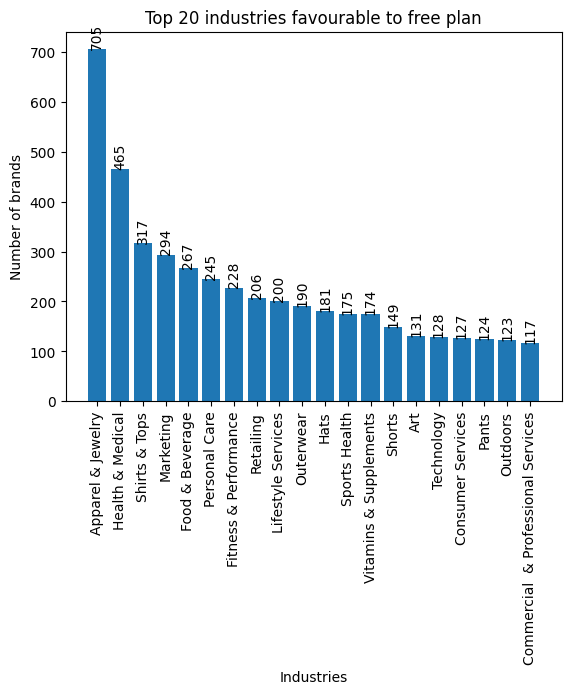

In [95]:
industries = category_counts_free[:20].index
count = category_counts_free[:20].values

fig, ax = plt.subplots()
bars = ax.bar(industries, count)

y_pos = range(len(industries))
plt.xticks(y_pos, industries, rotation=90)
plt.xlabel('Industries')
plt.ylabel('Number of brands')
plt.title('Top 20 industries favourable to free plan')

ax.bar_label(bars, rotation=90)

[Text(0, 0, '16'),
 Text(0, 0, '14'),
 Text(0, 0, '12'),
 Text(0, 0, '9'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2')]

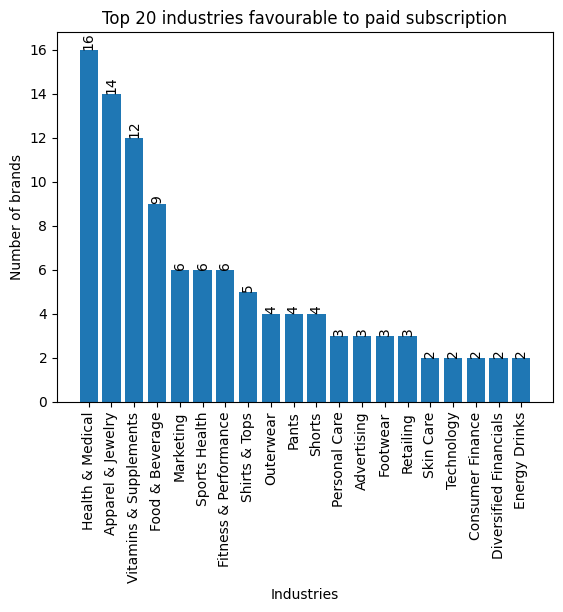

In [96]:
industries = category_counts_paid[:20].index
count = category_counts_paid[:20].values

fig, ax = plt.subplots()
bars = ax.bar(industries, count)

y_pos = range(len(industries))
plt.xticks(y_pos, industries, rotation=90)
plt.xlabel('Industries')
plt.ylabel('Number of brands')
plt.title('Top 20 industries favourable to paid subscription')

ax.bar_label(bars, rotation=90)

## Some of the least popular industries in the free plan with less than 5 brands from these industries are 

In [112]:
np.array(list(category_counts_free[category_counts_free.values < 5].index))

array(['Printers, Copiers & Fax Machines', 'Industrial Machinery',
       'Storage & Wearhousing', 'Precious Metals & Minerals',
       'Security & Alarm Services', 'Office REITs ', 'Electric Utilities',
       'Multi-Utilities', 'Gas Utilities', 'Cutlery', 'Water Utilities',
       'Steel', 'Equipment Repair Services',
       'Industrial Maintenance Services', 'Forest Products',
       'Animal Shelter', 'Industrial REITs', 'Integrated Oil & Gas',
       'Heavy Electrical Equipment', 'Sashes',
       'Oil & Gas Equipment & Services',
       'Oil & Gas Storage & Transportation',
       'Independent Power Producers & Energy Traders',
       'Renewable Electricity ', 'Retail REITs', 'Construction Materials',
       'Hand Muffs', 'Pet Clothing', 'Aluminum', 'Health Care  Services',
       'Diversified REITs', 'Coal & Consumable Fuels',
       'Consumer Auctioneers', 'Electrical Components & Equipment',
       'Tobacco Retail', 'Paper Packaging', 'Industrial Gases',
       'Home Security', 